<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Lesson 4 - Exercise 2

Simple substitution cipher is a method of encrypting. Each plaintext alphabet is replaced by other alphabet ([Wikipedia](https://en.wikipedia.org/wiki/Substitution_cipher)). [cipher.txt](https://github.com/ikuehirata/CodingSeminarCMBR/blob/master/exercises_and_model_answers/Lesson4-files/cipher.txt) is an English text encrpyted by simple substitution cipher. Decrypt this and obtain the encryption table.

1. Frequency analysis is a powerful method to help break a simple substitution cipher. In this method, each alphabet is replaced according to the frequency of the appearance in the text. It is known that in any given stretch of written language, certain letters and combinations of letters occur with varying frequencies ([Wikipedia](https://en.wikipedia.org/wiki/Frequency_analysis)).
    1. Count the number of the appearance of each alphabet in a plaintext file [kant.txt](https://github.com/ikuehirata/CodingSeminarCMBR/blob/master/exercises_and_model_answers/Lesson4-files/kant.txt) and plot it in a histogram.
    1. Count the number of the appearance of the combination of any given two alphabets and plot top 20 combinations in a histogram.
    1. Count the number of the appearance of the combination of any given three alphabets and plot top 20 combinations in a histogram.

1. Using the results above, decipher the text and obtain the encryption table.

In `Lesson4_Exercise2_modelanswer.ipynb`, I used `collections.Counter` class. 
By using this function, we can make all the counting process even more simpler.
(`seaborn` has `countplot` function to plot the count of each element but in this case using `Counter` is simpler)

In [1]:
# open file and read txt
with open("Lesson4-files/kant.txt", "r", encoding="utf8") as f:
    kant = f.read()
# modify the text
import re
kant = re.sub(r"\W", "", kant) # remove non-alphabet characters
kant = kant.lower() # make all lower case

# open cipher file and read txt
with open("Lesson4-files/cipher.txt", "r", encoding="utf8") as f:
    cipher = f.read()

from collections import Counter
import pandas as pd
# define a function:
# 1. generate all n-char combination from the text
# 2. count the frequency
# 3. sort
def returnCombination(text, n):
    comb = []
    # generate all the n-char combination
    for index, c in enumerate(text[:-n]):
        comb.append(text[index:index+n])

    c = Counter(comb)
    df = pd.DataFrame.from_dict(c, orient="index", columns=["freq"])
    df["n-char"] = n # add new column "n-char"
    df["freq_perc"] = df["freq"]/len(comb)
    df.sort_values("freq", inplace=True, ascending=False)
    df["dummy-x"] = range(len(df)) # this is a dummy x to plot the data in one panel
    df.index.name = "char"
    return df[:26]

# for better plotting, a new dataframe is prepared. This time new columns "text" and "n-char" is added.
alldata = pd.DataFrame(index=[], columns=[])
for n in range(1,5):
    df1 = returnCombination(kant, n)
    df1["text"] = "kant"
    df2 = returnCombination(cipher, n)
    df2["text"] = "cipher"
    alldata = pd.concat([alldata, df1, df2])
print(alldata)

      freq  n-char  freq_perc  dummy-x    text
char                                          
e     1745       1   0.141193        0    kant
t     1231       1   0.099604        1    kant
n      980       1   0.079294        2    kant
s      968       1   0.078323        3    kant
a      947       1   0.076624        4    kant
i      923       1   0.074682        5    kant
o      902       1   0.072983        6    kant
r      670       1   0.054212        7    kant
h      592       1   0.047900        8    kant
c      542       1   0.043855        9    kant
l      462       1   0.037382       10    kant
d      368       1   0.029776       11    kant
u      364       1   0.029452       12    kant
p      319       1   0.025811       13    kant
f      261       1   0.021118       14    kant
m      226       1   0.018286       15    kant
y      196       1   0.015859       16    kant
b      173       1   0.013998       17    kant
w      134       1   0.010842       18    kant
g      126   

<Figure size 432x288 with 0 Axes>

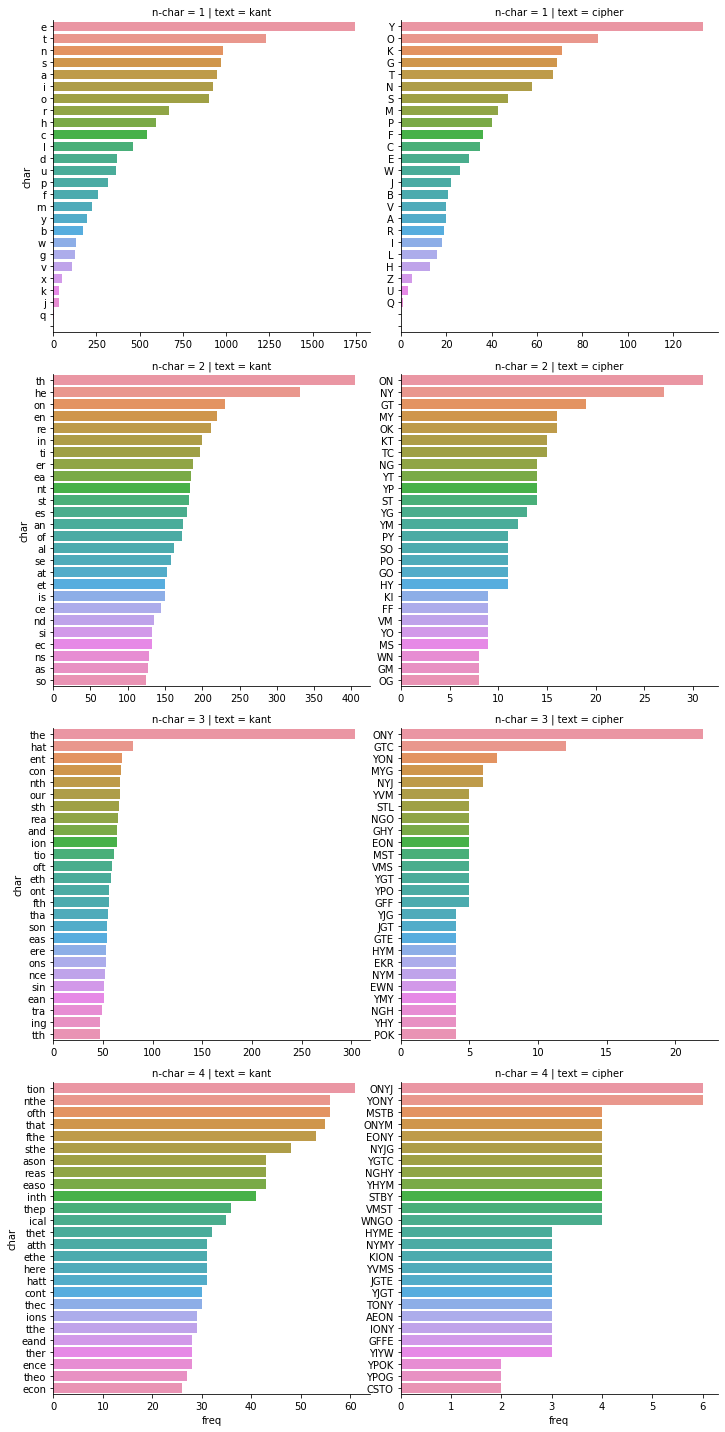

In [2]:
%matplotlib inline
# from here the dataframe alldata is plotted beautifully, using seaborn function.
import matplotlib.pyplot as plt
fig = plt.figure()
import seaborn as sns

textlist = ["kant", "cipher"]
def updatehistogram(dic):
    # update the histogram
    newindex = list(map(lambda e: e.translate(str.maketrans(dic)), alldata.index))
    decdata = alldata.copy()
    decdata.index = newindex
    g = sns.catplot(x="freq", y="dummy-x", col="text", row="n-char", kind="bar", 
        data=decdata, sharey=False, sharex=False, orient="h")
    g.set_ylabels("char")    
    for i in range(0,4):
        for j in range(2):
            g.axes[i, j].set(yticklabels=decdata[(decdata["text"]==textlist[j]) & (decdata["n-char"]==i+1)].index)
    plt.show()

updatehistogram({})

We can identify "ONY" as "the"

JeTURCLeLeTeMGFFEJKMeAE the eEethGTAE the hGTCAeBGRPeStAeFKTLPtKeHeMEAKCEtKPeeEKRtKIeWtKBKJeSTtKRBhWSthEKReHeMEKTePeePWhGtEKRGVVeGMtKAeIeWMeGFFEZTKWWhGtEKRGMeGTCthKPeIeWCGMeTKtKVVKPe the JPeFHePtK the KVSTSKTKI the JGTEWhKhGHe the JGUePtEKI the PtGtetKCeIeTC the JGTCST the GBtSKTPKIGFFJeTGTCePVeBSGFFEKIVMSTBePWhSBhStSPTKtVMRCeTttKBhGFFeTLeKTeURCLePAE the MePRFtIKMthGtMeGPKTFetGVMSTBehGHe the BMeCStKIBKTQReMSTLGTChKFCSTLhSPPtGte the JeGTPWSFFGFWGEPAeBKTPSCeMeChKTePtGTCheWSFFAeVMGSPeCAEeHeMEAKCEAeBGRPe the HRFLGMGMeGFWGEPtGZeTAEWhGtGthSTLPeeJPtKAeGTCAEWhGtBKJePKIStGTCST the WKMFC the MeGMeKTFE the HRFLGMIKM the IeWISTCGVFGBe the MeKTFEWheT the JGTEhGHeTKLMKRTCtKMePtKTKTeVMSTBeKI the VMePeTttSJeWhKJStSPTKtWeFFtKTGJeTeHeMVMeGBhePGTEthSTLeFPeARtVeGBeGTCLKKCIGSthGTCtKAKthheSPJKPthKPtSFeGTCeS the MSIhehGCZeVtStWKRFChGHeCeVMSHeChSJKIMeVRtGtSKTGTCZSTLCKJJGTEGtSJeWMStteTAETSBKFKJGBhSGHeFFStMGTPFGteCAEWZJGMMSKtt the VMSTBehttVPWWWLRteTAeMLKML


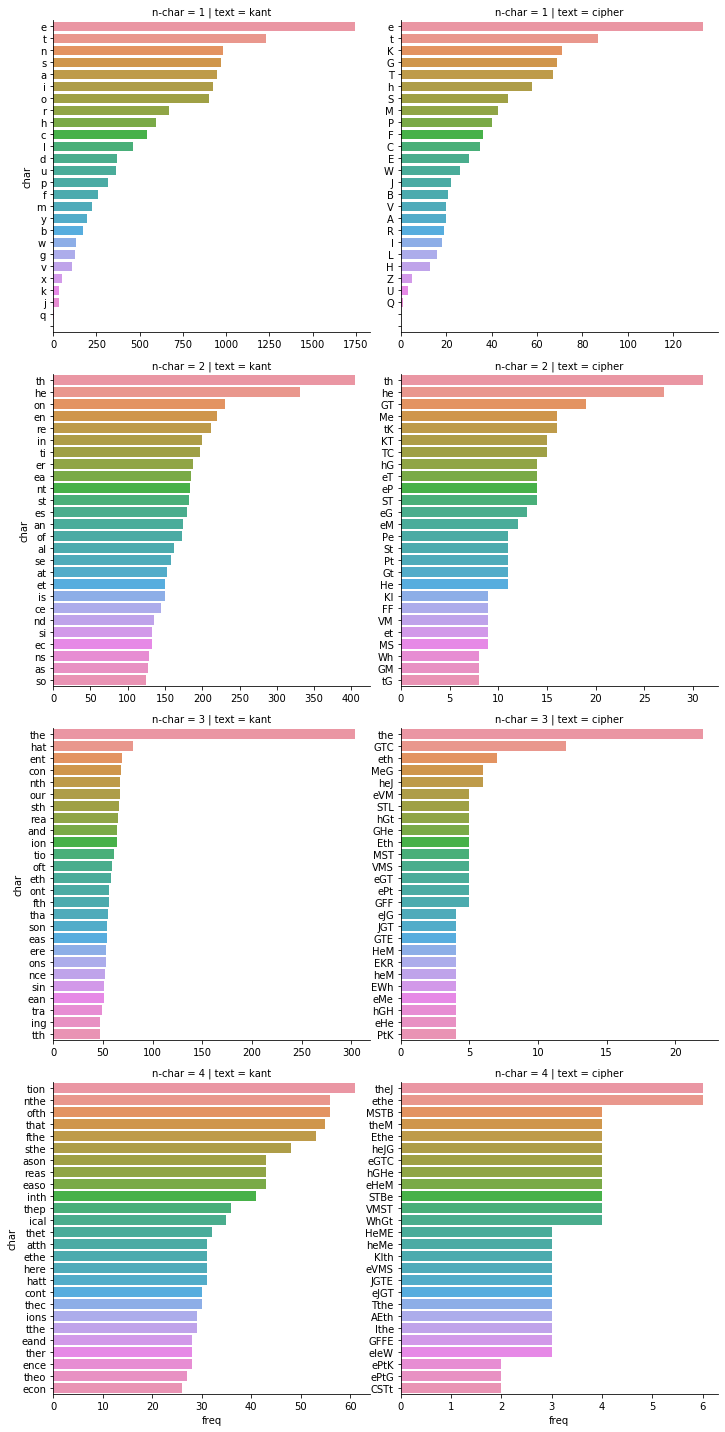

In [3]:
dic = {"O": "t", "N": "h", "Y": "e"}
def updatedecoding(dic):
    cipherdec = cipher.translate(str.maketrans(dic)) # translate
    # for readability, insert spaces before and after "the"
    readability = cipherdec.replace("the", " the ")
    print(readability)

updatedecoding(dic)
updatehistogram(dic)

From 2 character graphs, we can identify M as r.

JeTURCLeLeTerGFFEJKreAE the eEethGTAE the hGTCAeBGRPeStAeFKTLPtKeHerEAKCEtKPeeEKRtKIeWtKBKJeSTtKRBhWSthEKReHerEKTePeePWhGtEKRGVVeGrtKAeIeWreGFFEZTKWWhGtEKRGreGTCthKPeIeWCGreTKtKVVKPe the JPeFHePtK the KVSTSKTKI the JGTEWhKhGHe the JGUePtEKI the PtGtetKCeIeTC the JGTCST the GBtSKTPKIGFFJeTGTCePVeBSGFFEKIVrSTBePWhSBhStSPTKtVrRCeTttKBhGFFeTLeKTeURCLePAE the rePRFtIKrthGtreGPKTFetGVrSTBehGHe the BreCStKIBKTQRerSTLGTChKFCSTLhSPPtGte the JeGTPWSFFGFWGEPAeBKTPSCereChKTePtGTCheWSFFAeVrGSPeCAEeHerEAKCEAeBGRPe the HRFLGrGreGFWGEPtGZeTAEWhGtGthSTLPeeJPtKAeGTCAEWhGtBKJePKIStGTCST the WKrFC the reGreKTFE the HRFLGrIKr the IeWISTCGVFGBe the reKTFEWheT the JGTEhGHeTKLrKRTCtKrePtKTKTeVrSTBeKI the VrePeTttSJeWhKJStSPTKtWeFFtKTGJeTeHerVreGBhePGTEthSTLeFPeARtVeGBeGTCLKKCIGSthGTCtKAKthheSPJKPthKPtSFeGTCeS the rSIhehGCZeVtStWKRFChGHeCeVrSHeChSJKIreVRtGtSKTGTCZSTLCKJJGTEGtSJeWrStteTAETSBKFKJGBhSGHeFFStrGTPFGteCAEWZJGrrSKtt the VrSTBehttVPWWWLRteTAerLKrL


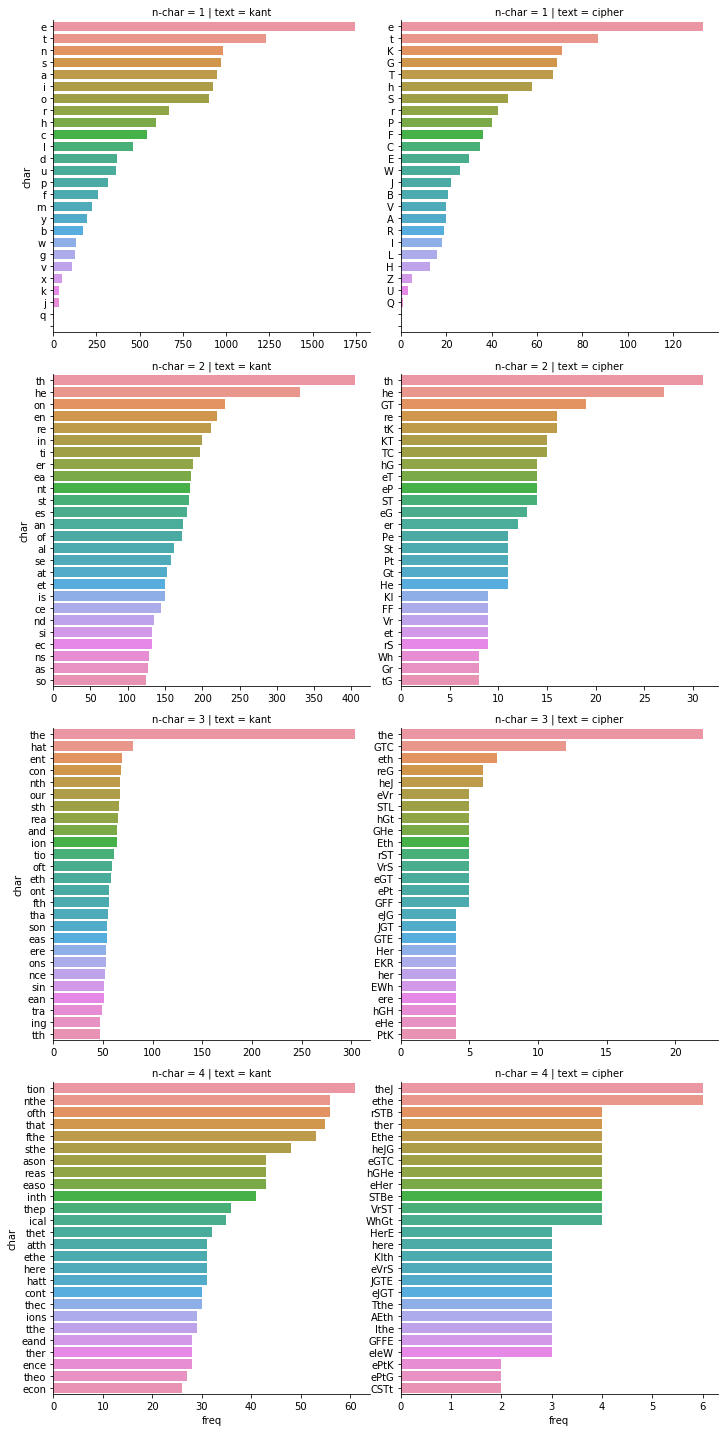

In [4]:
dic.update({"M": "r"})
updatedecoding(dic)
updatehistogram(dic)

For 3 characters, "hat" has high frequency and we have "hGt". G should be a. We also have high frequency "GTC", now G is a, "GTC" will be "and". "and" is likely to be a single word, so I put space for readability.

JenURdLeLeneraFFEJKreAE the eEethanAE the h and AeBaRPeStAeFKnLPtKeHerEAKdEtKPeeEKRtKIeWtKBKJeSntKRBhWSthEKReHerEKnePeePWhatEKRaVVeartKAeIeWreaFFEZnKWWhatEKRare and thKPeIeWdarenKtKVVKPe the JPeFHePtK the KVSnSKnKI the JanEWhKhaHe the JaUePtEKI the PtatetKdeIend the J and Sn the aBtSKnPKIaFFJen and ePVeBSaFFEKIVrSnBePWhSBhStSPnKtVrRdenttKBhaFFenLeKneURdLePAE the rePRFtIKrthatreaPKnFetaVrSnBehaHe the BredStKIBKnQRerSnL and hKFdSnLhSPPtate the JeanPWSFFaFWaEPAeBKnPSderedhKnePt and heWSFFAeVraSPedAEeHerEAKdEAeBaRPe the HRFLarareaFWaEPtaZenAEWhatathSnLPeeJPtKAe and AEWhatBKJePKISt and Sn the WKrFd the reareKnFE the HRFLarIKr the IeWISndaVFaBe the reKnFEWhen the JanEhaHenKLrKRndtKrePtKnKneVrSnBeKI the VrePenttSJeWhKJStSPnKtWeFFtKnaJeneHerVreaBhePanEthSnLeFPeARtVeaBe and LKKdIaSth and tKAKthheSPJKPthKPtSFe and eS the rSIhehadZeVtStWKRFdhaHedeVrSHedhSJKIreVRtatSKn and ZSnLdKJJanEatSJeWrSttenAEnSBKFKJaBhSaHeFFStranPFatedAEWZJarrSKtt the VrSnBehttVPWWWLRtenAerLKrL


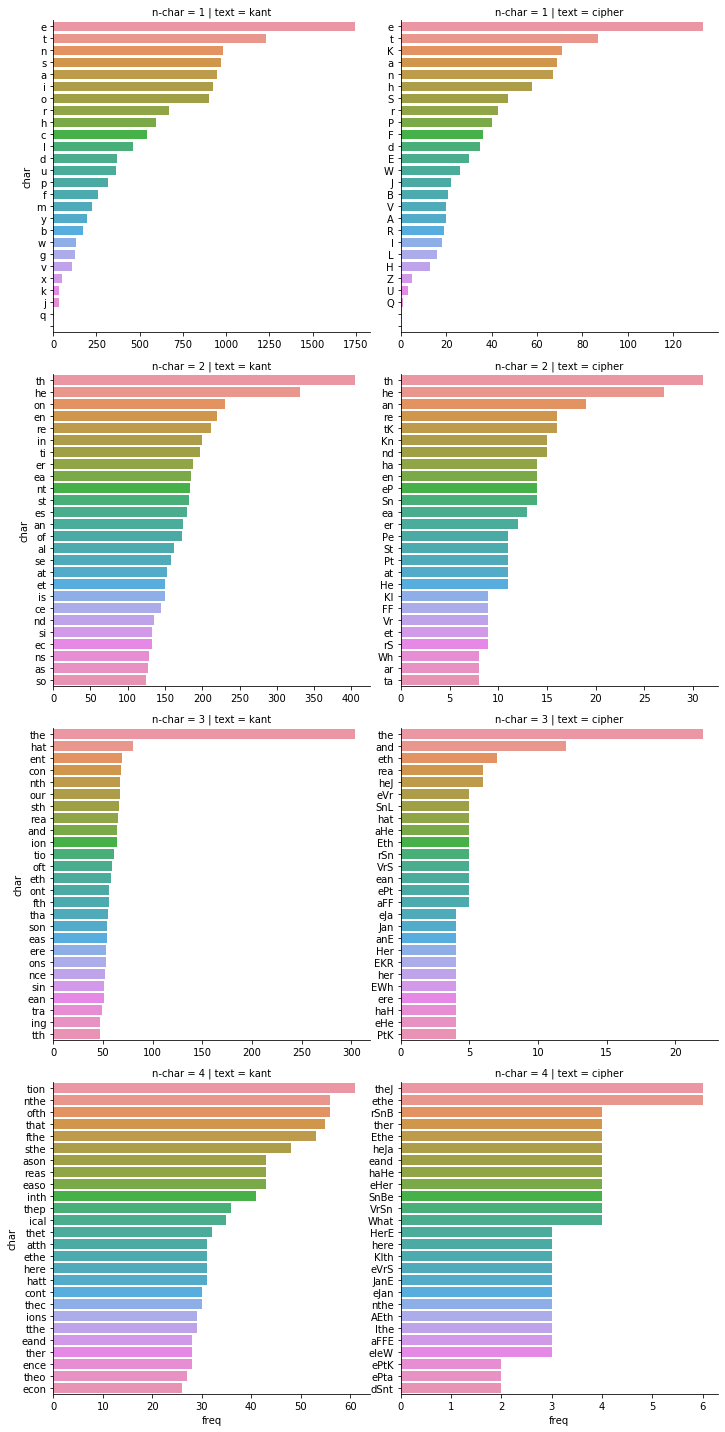

In [5]:
dic.update({"G": "a", "T": "n", "C": "d"})
def updatedecoding(dic):
    cipherdec = cipher.translate(str.maketrans(dic)) # translate
    readability = cipherdec.replace("the", " the ").replace("and", " and ") # add space
    print(readability)

updatedecoding(dic)
updatehistogram(dic)

Now for the top frequency characters, s, i, o are missing, which shouldbe K, S, P. From "eP", P is s. For K and S, let's put K as i and S as o.

JenURdLeLeneraFFEJireAE the eEethanAE the h and AeBaRseotAeFinLstieHerEAidEtiseeEiRtiIeWtiBiJeontiRBhWothEiReHerEineseesWhatEiRaVVeartiAeIeWreaFFEZniWWhatEiRare and thiseIeWdarenitiVVise the JseFHesti the iVonoiniI the JanEWhihaHe the JaUestEiI the statetideIend the J and on the aBtoinsiIaFFJen and esVeBoaFFEiIVronBesWhoBhotosnitVrRdenttiBhaFFenLeineURdLesAE the resRFtIirthatreasinFetaVronBehaHe the BredotiIBinQReronL and hiFdonLhosstate the JeansWoFFaFWaEsAeBinsoderedhinest and heWoFFAeVraosedAEeHerEAidEAeBaRse the HRFLarareaFWaEstaZenAEWhatathonLseeJstiAe and AEWhatBiJesiIot and on the WirFd the reareinFE the HRFLarIir the IeWIondaVFaBe the reinFEWhen the JanEhaHeniLriRndtirestinineVronBeiI the VresenttoJeWhiJotosnitWeFFtinaJeneHerVreaBhesanEthonLeFseARtVeaBe and LiidIaoth and tiAithheosJisthistoFe and eo the roIhehadZeVtotWiRFdhaHedeVroHedhoJiIreVRtatoin and ZonLdiJJanEatoJeWrottenAEnoBiFiJaBhoaHeFFotransFatedAEWZJarroitt the VronBehttVsWWWLRtenAerLirL


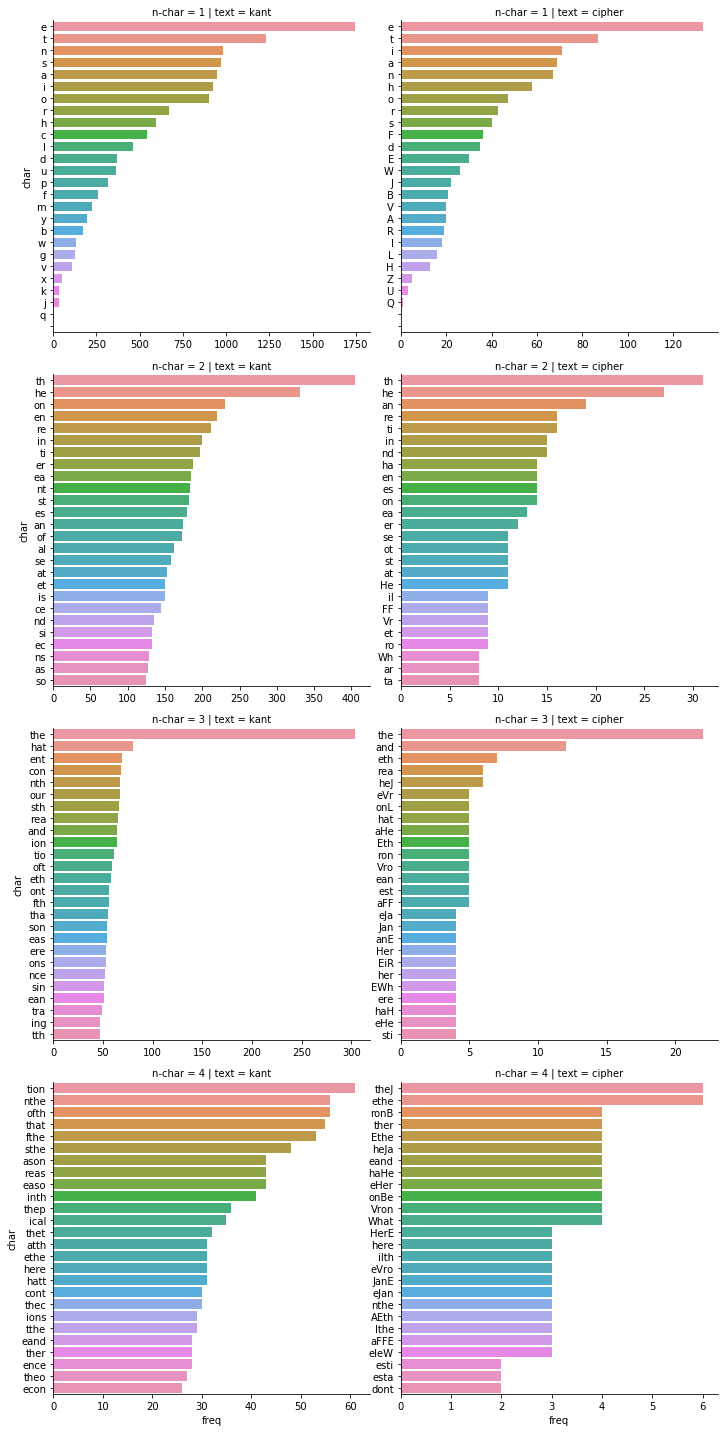

In [6]:
dic.update({"P": "s", "K": "i", "S": "o"})
updatedecoding(dic)
updatehistogram(dic)

I found "the iVonoiniI the" and the middle word does not make sense. Maybe i and o should be switched...

In [7]:
dic["K"] = "o"
dic["S"] = "i"
updatedecoding(dic)

JenURdLeLeneraFFEJoreAE the eEethanAE the h and AeBaRseitAeFonLstoeHerEAodEtoseeEoRtoIeWtoBoJeintoRBhWithEoReHerEoneseesWhatEoRaVVeartoAeIeWreaFFEZnoWWhatEoRare and thoseIeWdarenotoVVose the JseFHesto the oVinionoI the JanEWhohaHe the JaUestEoI the statetodeIend the J and in the aBtionsoIaFFJen and esVeBiaFFEoIVrinBesWhiBhitisnotVrRdenttoBhaFFenLeoneURdLesAE the resRFtIorthatreasonFetaVrinBehaHe the BreditoIBonQRerinL and hoFdinLhisstate the JeansWiFFaFWaEsAeBonsideredhonest and heWiFFAeVraisedAEeHerEAodEAeBaRse the HRFLarareaFWaEstaZenAEWhatathinLseeJstoAe and AEWhatBoJesoIit and in the WorFd the reareonFE the HRFLarIor the IeWIindaVFaBe the reonFEWhen the JanEhaHenoLroRndtorestononeVrinBeoI the VresenttiJeWhoJitisnotWeFFtonaJeneHerVreaBhesanEthinLeFseARtVeaBe and LoodIaith and toAothheisJosthostiFe and ei the riIhehadZeVtitWoRFdhaHedeVriHedhiJoIreVRtation and ZinLdoJJanEatiJeWrittenAEniBoFoJaBhiaHeFFitransFatedAEWZJarriott the VrinBehttVsWWWLRtenAerLorL


Now we can concentrate on the cipher itself. Here I add spaces by guessing.

In [8]:
cipher = "JenURdLeLeneraFFEJoreAE the eEethanAE the hand AeBaRseitAeFonLstoeHerEAodEto seeEoRtoIeWtoBoJeintoRBhWithEoReHerEoneseesWhatEoRaVVeartoAeIeWreaFFEZnoWWhatEoR are and those IeWdarenotoVVose the JseFHesto the oVinion oI the JanEWhohaHe the JaUestEoI the state to deIend theJ and in the aBtionsoIaFFJen and esVeBiaFFEoIVrinBesWhiBh it is not VrRdent to BhaFFenLeoneURdLesAE the resRFt Ior that reason FetaVrinBehaHe the Bredit oI BonQRerinL and hoFdinLhis state the JeansWiFFaFWaEsAe Bonsidered honest and heWiFFAeV raised AEeHerEAodEAeBaRse the HRFLar are aFWaEstaZenAEWhatathinLseeJstoAe and AEWhatBoJesoIit and in the WorFd there are onFE the HRFLarIor the IeWIindaVFaBe there onFEWhen the JanEhaHenoLroRnd to rest on one VrinBeoI the VresenttiJeWhoJit is not WeFFtonaJeneHerVreaBhesanEthinLeFseARtVeaBe and LoodIaith and toAothheisJosthostiFe and either iIhehadZeVtitWoRFdhaHedeVriHedhiJoIreVRtation and ZinLdoJJanEatiJeWritten AEniBoFoJaBhiaHeFFitransFatedAEWZJarriott the VrinBehttVsWWWLRtenAerLorL"
print(cipher)

JenURdLeLeneraFFEJoreAE the eEethanAE the hand AeBaRseitAeFonLstoeHerEAodEto seeEoRtoIeWtoBoJeintoRBhWithEoReHerEoneseesWhatEoRaVVeartoAeIeWreaFFEZnoWWhatEoR are and those IeWdarenotoVVose the JseFHesto the oVinion oI the JanEWhohaHe the JaUestEoI the state to deIend theJ and in the aBtionsoIaFFJen and esVeBiaFFEoIVrinBesWhiBh it is not VrRdent to BhaFFenLeoneURdLesAE the resRFt Ior that reason FetaVrinBehaHe the Bredit oI BonQRerinL and hoFdinLhis state the JeansWiFFaFWaEsAe Bonsidered honest and heWiFFAeV raised AEeHerEAodEAeBaRse the HRFLar are aFWaEstaZenAEWhatathinLseeJstoAe and AEWhatBoJesoIit and in the WorFd there are onFE the HRFLarIor the IeWIindaVFaBe there onFEWhen the JanEhaHenoLroRnd to rest on one VrinBeoI the VresenttiJeWhoJit is not WeFFtonaJeneHerVreaBhesanEthinLeFseARtVeaBe and LoodIaith and toAothheisJosthostiFe and either iIhehadZeVtitWoRFdhaHedeVriHedhiJoIreVRtation and ZinLdoJJanEatiJeWritten AEniBoFoJaBhiaHeFFitransFatedAEWZJarriott the VrinBehttVsWWWLRtenAerLor

"oVinion" is "opinion", "oI the" is "of the", "Bonsidered" is "considered" so V is p, I is f, B is c.

In [9]:
dic.update({"V": "p", "I": "f", "B": "c"})

def updatedecoding(dic):
    cipherdec = cipher.translate(str.maketrans(dic)) # translate
    print(cipherdec)

updatedecoding(dic)

JenURdLeLeneraFFEJoreAE the eEethanAE the hand AecaRseitAeFonLstoeHerEAodEto seeEoRtofeWtocoJeintoRchWithEoReHerEoneseesWhatEoRappeartoAefeWreaFFEZnoWWhatEoR are and those feWdarenotoppose the JseFHesto the opinion of the JanEWhohaHe the JaUestEof the state to defend theJ and in the actionsofaFFJen and especiaFFEofprincesWhich it is not prRdent to chaFFenLeoneURdLesAE the resRFt for that reason FetaprincehaHe the credit of conQRerinL and hoFdinLhis state the JeansWiFFaFWaEsAe considered honest and heWiFFAep raised AEeHerEAodEAecaRse the HRFLar are aFWaEstaZenAEWhatathinLseeJstoAe and AEWhatcoJesofit and in the WorFd there are onFE the HRFLarfor the feWfindapFace there onFEWhen the JanEhaHenoLroRnd to rest on one princeof the presenttiJeWhoJit is not WeFFtonaJeneHerpreachesanEthinLeFseARtpeace and Loodfaith and toAothheisJosthostiFe and either ifhehadZeptitWoRFdhaHedepriHedhiJofrepRtation and ZinLdoJJanEatiJeWritten AEnicoFoJachiaHeFFitransFatedAEWZJarriott the princehttpsWWWLRtenAerLor

"especiaFFEofprincesWhich" is "especially of princes which" therefore F is l, E is y, W is w. "the resRFt for" is "the result for" so R is u.

In [10]:
dic.update({"F": "l", "E": "y", "W": "w", "R": "u"})
updatedecoding(dic)

JenUudLeLenerallyJoreAy the eyethanAy the hand AecauseitAelonLstoeHeryAodyto seeyoutofewtocoJeintouchwithyoueHeryoneseeswhatyouappeartoAefewreallyZnowwhatyou are and those fewdarenotoppose the JselHesto the opinion of the JanywhohaHe the JaUestyof the state to defend theJ and in the actionsofallJen and especiallyofprinceswhich it is not prudent to challenLeoneUudLesAy the result for that reason letaprincehaHe the credit of conQuerinL and holdinLhis state the JeanswillalwaysAe considered honest and hewillAep raised AyeHeryAodyAecause the HulLar are alwaystaZenAywhatathinLseeJstoAe and AywhatcoJesofit and in the world there are only the HulLarfor the fewfindaplace there onlywhen the JanyhaHenoLround to rest on one princeof the presenttiJewhoJit is not welltonaJeneHerpreachesanythinLelseAutpeace and Loodfaith and toAothheisJosthostile and either ifhehadZeptitwouldhaHedepriHedhiJofreputation and ZinLdoJJanyatiJewritten AynicoloJachiaHellitranslatedAywZJarriott the princehttpswwwLutenAerLor

"the actionsofallJen and" seems "the actions of all men" so J is m

In [11]:
dic.update({"J": "m"})
updatedecoding(dic)

menUudLeLenerallymoreAy the eyethanAy the hand AecauseitAelonLstoeHeryAodyto seeyoutofewtocomeintouchwithyoueHeryoneseeswhatyouappeartoAefewreallyZnowwhatyou are and those fewdarenotoppose the mselHesto the opinion of the manywhohaHe the maUestyof the state to defend them and in the actionsofallmen and especiallyofprinceswhich it is not prudent to challenLeoneUudLesAy the result for that reason letaprincehaHe the credit of conQuerinL and holdinLhis state the meanswillalwaysAe considered honest and hewillAep raised AyeHeryAodyAecause the HulLar are alwaystaZenAywhatathinLseemstoAe and Aywhatcomesofit and in the world there are only the HulLarfor the fewfindaplace there onlywhen the manyhaHenoLround to rest on one princeof the presenttimewhomit is not welltonameneHerpreachesanythinLelseAutpeace and Loodfaith and toAothheismosthostile and either ifhehadZeptitwouldhaHedepriHedhimofreputation and ZinLdommanyatimewritten AynicolomachiaHellitranslatedAywZmarriott the princehttpswwwLutenAerLor

"Aecause" is "because" so A is b.

In [12]:
dic.update({"A": "b"})
updatedecoding(dic)

menUudLeLenerallymoreby the eyethanby the hand becauseitbelonLstoeHerybodyto seeyoutofewtocomeintouchwithyoueHeryoneseeswhatyouappeartobefewreallyZnowwhatyou are and those fewdarenotoppose the mselHesto the opinion of the manywhohaHe the maUestyof the state to defend them and in the actionsofallmen and especiallyofprinceswhich it is not prudent to challenLeoneUudLesby the result for that reason letaprincehaHe the credit of conQuerinL and holdinLhis state the meanswillalwaysbe considered honest and hewillbep raised byeHerybodybecause the HulLar are alwaystaZenbywhatathinLseemstobe and bywhatcomesofit and in the world there are only the HulLarfor the fewfindaplace there onlywhen the manyhaHenoLround to rest on one princeof the presenttimewhomit is not welltonameneHerpreachesanythinLelsebutpeace and Loodfaith and tobothheismosthostile and either ifhehadZeptitwouldhaHedepriHedhimofreputation and ZinLdommanyatimewritten bynicolomachiaHellitranslatedbywZmarriott the princehttpswwwLutenberLor

"becauseitbelonLstoeHerybodyto" is "because it belongs to everybody to" therefore L is g, H is v

In [13]:
dic.update({"L": "g", "H": "v"})
updatedecoding(dic)

menUudgegenerallymoreby the eyethanby the hand becauseitbelongstoeverybodyto seeyoutofewtocomeintouchwithyoueveryoneseeswhatyouappeartobefewreallyZnowwhatyou are and those fewdarenotoppose the mselvesto the opinion of the manywhohave the maUestyof the state to defend them and in the actionsofallmen and especiallyofprinceswhich it is not prudent to challengeoneUudgesby the result for that reason letaprincehave the credit of conQuering and holdinghis state the meanswillalwaysbe considered honest and hewillbep raised byeverybodybecause the vulgar are alwaystaZenbywhatathingseemstobe and bywhatcomesofit and in the world there are only the vulgarfor the fewfindaplace there onlywhen the manyhavenoground to rest on one princeof the presenttimewhomit is not welltonameneverpreachesanythingelsebutpeace and goodfaith and tobothheismosthostile and either ifhehadZeptitwouldhavedeprivedhimofreputation and Zingdommanyatimewritten bynicolomachiavellitranslatedbywZmarriott the princehttpswwwgutenbergor

Remainings are Z, Q, U, which are k, q, j. Now it's done!

In [14]:
dic.update({"Z": "k", "Q": "q", "U": "j"})
updatedecoding(dic)

menjudgegenerallymoreby the eyethanby the hand becauseitbelongstoeverybodyto seeyoutofewtocomeintouchwithyoueveryoneseeswhatyouappeartobefewreallyknowwhatyou are and those fewdarenotoppose the mselvesto the opinion of the manywhohave the majestyof the state to defend them and in the actionsofallmen and especiallyofprinceswhich it is not prudent to challengeonejudgesby the result for that reason letaprincehave the credit of conquering and holdinghis state the meanswillalwaysbe considered honest and hewillbep raised byeverybodybecause the vulgar are alwaystakenbywhatathingseemstobe and bywhatcomesofit and in the world there are only the vulgarfor the fewfindaplace there onlywhen the manyhavenoground to rest on one princeof the presenttimewhomit is not welltonameneverpreachesanythingelsebutpeace and goodfaith and tobothheismosthostile and either ifhehadkeptitwouldhavedeprivedhimofreputation and kingdommanyatimewritten bynicolomachiavellitranslatedbywkmarriott the princehttpswwwgutenbergor

For the original text, please check [`this file`](https://github.com/ikuehirata/CodingSeminarCMBR/blob/master/exercises_and_model_answers/Lesson4-files/ilprincipe_original.txt). I uploaded the [`encryption code`](https://github.com/ikuehirata/CodingSeminarCMBR/blob/master/exercises_and_model_answers/Lesson4-files/simplesubstitutioncipher.py) too. I hope you had fun!